<a href="https://colab.research.google.com/github/bambadij/diabete_meriskill/blob/main/Diabetes_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title of the project 2: “Diabetes Patients”





### Objective

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

### Hypothesis
**Null Hypothesis(Ho)** : There is no signgificant relationship between rate glucose and outcome

**Alternate Hypothesis(Ha)** : There is a relationship between rate glucose and outcome

About this file
Information about dataset attributes -

- Pregnancies: To express the Number of pregnancies
- Glucose: To express the Glucose level in blood
- BloodPressure: To express the Blood pressure measurement
- SkinThickness: To express the thickness of the skin
- Insulin: To express the Insulin level in blood
- BMI: To express the Body mass index
- DiabetesPedigreeFunction: To express the Diabetes percentage
- Age: To express the age
- Outcome: To express the final result 1 is Yes and 0 is No

In [ ]:

# Data handling
import pandas as pd
pd.set_option('display.max_columns', None)
import openpyxl
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


## Data Loading


In [ ]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##  Data Preparation
##### let's check if we are missing value

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Let's check unique our column data

In [ ]:
data['Outcome'].nunique()

2

In [ ]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
data['Age'].nunique()

52

In [ ]:
data['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [ ]:
data['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

Range our column Age for this create 8 volets of 20 to 30 ,30 to 40 ...

In [ ]:
age_range = ["({0}-{1})".format(age,age+10) for age in range(20,100,10)]
age_range

['(20-30)',
 '(30-40)',
 '(40-50)',
 '(50-60)',
 '(60-70)',
 '(70-80)',
 '(80-90)',
 '(90-100)']

Now reproduce and use pandas dataframe

In [ ]:
data['age_range'] = pd.cut(x=data['Age'],bins=8,labels=age_range)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_range
0,6,148,72,35,0,33.6,0.627,50,1,(50-60)
1,1,85,66,29,0,26.6,0.351,31,0,(30-40)
2,8,183,64,0,0,23.3,0.672,32,1,(30-40)
3,1,89,66,23,94,28.1,0.167,21,0,(20-30)
4,0,137,40,35,168,43.1,2.288,33,1,(30-40)


Check the number after age range

In [ ]:
data['age_range'].value_counts()

age_range
(20-30)     367
(30-40)     147
(40-50)     113
(50-60)      68
(60-70)      38
(70-80)      26
(80-90)       8
(90-100)      1
Name: count, dtype: int64

These value resemble what we are accustomed to seing almost the youngest are likely to have diabetes

### Hypothesis Testing
### Correlation

In [ ]:
data_copy = pd.read_csv('diabetes.csv')
correlation_value = data_copy.corr()
correlation_value

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

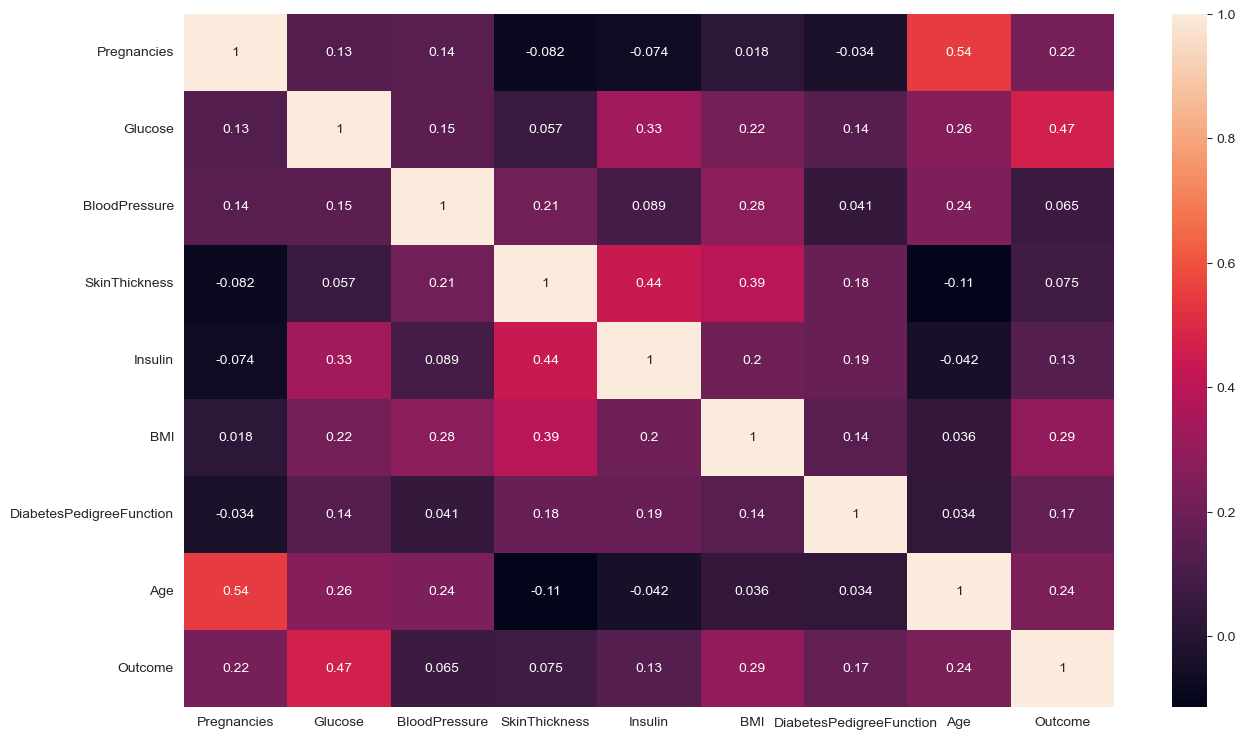

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(correlation_value,annot=True)

We are a little correlation with outcome and rate glucose 0.22

Apparently all the column have correlation.Here we are a correlation with age and pregnancies : 0.54 same for outcome and glucose : 0.47 we are also  correlation with insuline and Skinthickness 0.44

##### Drop column age

In [ ]:
data.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
age_range                   category
dtype: object

In [ ]:
df = data.drop(['Age'],axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,age_range
0,6,148,72,35,0,33.6,0.627,1,(50-60)
1,1,85,66,29,0,26.6,0.351,0,(30-40)
2,8,183,64,0,0,23.3,0.672,1,(30-40)
3,1,89,66,23,94,28.1,0.167,0,(20-30)
4,0,137,40,35,168,43.1,2.288,1,(30-40)
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,(70-80)
764,2,122,70,27,0,36.8,0.340,0,(20-30)
765,5,121,72,23,112,26.2,0.245,0,(30-40)
766,1,126,60,0,0,30.1,0.349,1,(50-60)


In [ ]:
## Now let's do the encoding using Label encoder
label = LabelEncoder()
df['age_range'] = label.fit_transform(df['age_range'])

In [ ]:
label.classes_

array(['(20-30)', '(30-40)', '(40-50)', '(50-60)', '(60-70)', '(70-80)',
       '(80-90)', '(90-100)'], dtype=object)

In [ ]:
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,age_range
0,6,148,72,35,0,33.6,0.627,1,3
1,1,85,66,29,0,26.6,0.351,0,1
2,8,183,64,0,0,23.3,0.672,1,1
3,1,89,66,23,94,28.1,0.167,0,0


#### Features Scaling
MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
## Create column
columns_to_scale = ['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','age_range']
columns_scaled = ['Pregnancies_scaled','Glucose_scaled','BloodPressure_scaled','SkinThickness_scaled','BMI_scaled','DiabetesPedigreeFunction_scaled','age_range_scaled']
scaled_values = df[columns_to_scale].values
scaled_array = scaler.fit_transform(scaled_values)
df_scaled = pd.DataFrame(scaled_array,columns=columns_scaled)
df_scaled

,Pregnancies_scaled,Glucose_scaled,BloodPressure_scaled,SkinThickness_scaled,BMI_scaled,DiabetesPedigreeFunction_scaled,age_range_scaled
0,0.352941,0.743719,0.590164,0.353535,0.500745,0.234415,0.428571
1,0.058824,0.427136,0.540984,0.292929,0.396423,0.116567,0.142857
2,0.470588,0.919598,0.524590,0.000000,0.347243,0.253629,0.142857
3,0.058824,0.447236,0.540984,0.232323,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.642325,0.943638,0.142857
...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.490313,0.039710,0.714286
764,0.117647,0.613065,0.573770,0.272727,0.548435,0.111870,0.000000
765,0.294118,0.608040,0.590164,0.232323,0.390462,0.071307,0.142857
766,0.058824,0.633166,0.491803,0.000000,0.448584,0.115713,0.428571


#### Concat df and df_scaled

In [ ]:
df2 = pd.concat([df,df_scaled],axis=1)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,age_range,Pregnancies_scaled,Glucose_scaled,BloodPressure_scaled,SkinThickness_scaled,BMI_scaled,DiabetesPedigreeFunction_scaled,age_range_scaled
0,6,148,72,35,0,33.6,0.627,1,3,0.352941,0.743719,0.590164,0.353535,0.500745,0.234415,0.428571
1,1,85,66,29,0,26.6,0.351,0,1,0.058824,0.427136,0.540984,0.292929,0.396423,0.116567,0.142857
2,8,183,64,0,0,23.3,0.672,1,1,0.470588,0.919598,0.524590,0.000000,0.347243,0.253629,0.142857
3,1,89,66,23,94,28.1,0.167,0,0,0.058824,0.447236,0.540984,0.232323,0.418778,0.038002,0.000000
4,0,137,40,35,168,43.1,2.288,1,1,0.000000,0.688442,0.327869,0.353535,0.642325,0.943638,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,5,0.588235,0.507538,0.622951,0.484848,0.490313,0.039710,0.714286
764,2,122,70,27,0,36.8,0.340,0,0,0.117647,0.613065,0.573770,0.272727,0.548435,0.111870,0.000000
765,5,121,72,23,112,26.2,0.245,0,1,0.294118,0.608040,0.590164,0.232323,0.390462,0.071307,0.142857
766,1,126,60,0,0,30.1,0.349,1,3,0.058824,0.633166,0.491803,0.000000,0.448584,0.115713,0.428571


#### Train-test split
Now create X features and y target fot this choose column without Class for X and y choose the Class column



In [ ]:
X =df2[['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','age_range']].values
y=df2['Outcome'].values
train_set,test_set,train_label,test_label = train_test_split(X,y,test_size=0.20,random_state=0)


In [ ]:
X[0]

array([  6.   , 148.   ,  72.   ,  35.   ,  33.6  ,   0.627,   3.   ])

##  Machine Learning Modeling
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.
### Model 1. Logistic Regression Model
#### Create the Model
Now compare our model for this we want to use this model

- **LogisticRegression**
- **KNeighborsClassifier**
- RandomForestClassifier
- GaussianVB
- SVG
- DecisionTreeRegression
- XGBClassifier


In [ ]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='auto')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC(gamma='scale')))
models.append(('RFC',RandomForestClassifier(n_estimators=100)))
models.append(('DTR',DecisionTreeClassifier()))
models.append(('XGB',XGBClassifier(objective='multi:softmax', num_class=3)))


In [ ]:
print(models)


[('LR', LogisticRegression(solver='liblinear')), ('KNN', KNeighborsClassifier()), ('NB', GaussianNB()), ('SVC', SVC()), ('RFC', RandomForestClassifier()), ('DTR', DecisionTreeClassifier()), ('XGB', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...))]


In [ ]:
results = []
names=[]

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import KFold

for name, model in models:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Create a KFold object
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    # Append results to the list
    results.append((name, scores.mean(), scores.std()))

results_df = pd.DataFrame(results, columns=['Model', 'Mean Accuracy', 'Std Deviation'])

results_df.sort_values(by='Mean Accuracy', ascending=False)

,Model,Mean Accuracy,Std Deviation
0,LR,0.769481,0.060597
3,SVC,0.761671,0.055112
2,NB,0.755246,0.073645
4,RFC,0.748633,0.058371
6,XGB,0.746087,0.062582
1,KNN,0.710885,0.048063
5,DTR,0.697932,0.066874


The output of k-fold cross validation is the mean accuracy and the std deviation
1- The Linear Regression model has the highest mean accuracy (0.769).This means that  on average the model correctly predicted the target variable for about 75% of the data points in each fold.

#### Classification Report

In [ ]:
LinearRegression_model = LogisticRegression(solver='liblinear',multi_class='auto')
LinearRegression_fitted =LinearRegression_model.fit(train_set,train_label)
LinearRegression_predict = LinearRegression_model.predict(test_set)

In [ ]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

We are only to value
- 1 mean predicted diabete
- 0 mean no diabete

In [ ]:
from sklearn.metrics import accuracy_score
print('Linear Regression Score accuracy:\n',accuracy_score(test_label,LinearRegression_predict))

Linear Regression Score accuracy:
 0.8116883116883117


Despite the size of our data our model gave a score of 0.811

In [ ]:
from sklearn.metrics import classification_report
print('Linear Regression Report"\n',classification_report(test_label,LinearRegression_predict,target_names=['0','1']))

Linear Regression Report"
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



There are the performance metrics our classification report that help us see how models are performing

Overall, our model appears to have a global accuracy of 81%, which is a good starting point for performance evaluation.

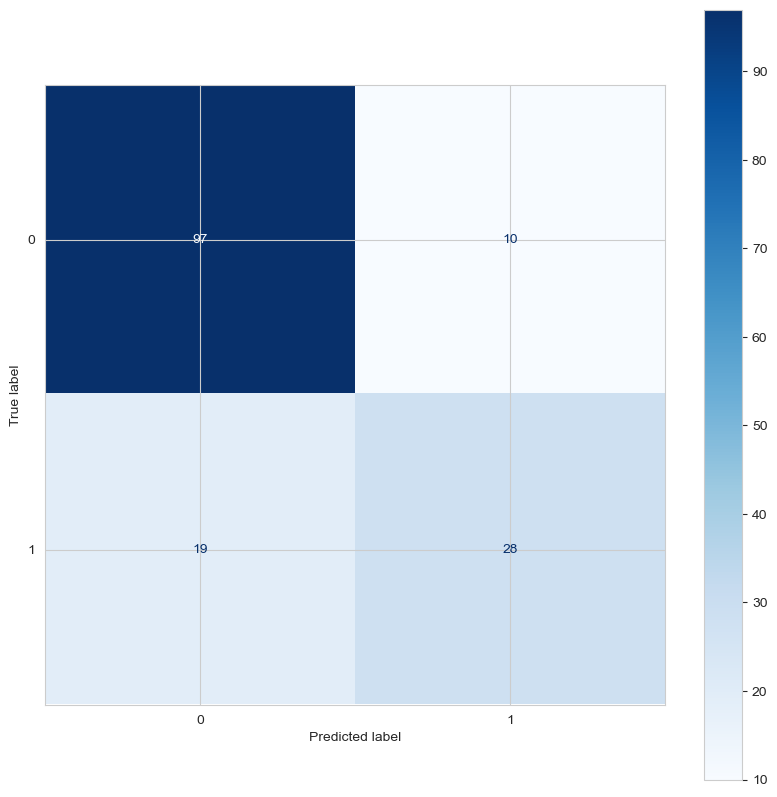

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

LR_matrix= confusion_matrix(test_label,LinearRegression_predict)
LR_confusion_matrix_predict_display= ConfusionMatrixDisplay(LR_matrix)
fig,ax = plt.subplots(figsize=(10,10))
LR_confusion_matrix_predict_display.plot(cmap=plt.cm.Blues,ax=ax)


In this confusion matrix:

- The value 97 in the top-left corner represents the true negatives (TN), which means that the model correctly predicted 97 instances of the negative class (class 0).
- The value 10 in the top-right corner represents the false positives (FP), indicating that the model incorrectly predicted 10 instances as positive (class 1) when they were actually negative (class 0).
- The value 19 in the bottom-left corner represents the false negatives (FN), signifying that the model incorrectly predicted 19 instances as negative (class 0) when they were actually positive (class 1).
- The value 28 in the bottom-right corner represents the true positives (TP), which means that the model correctly predicted 28 instances of the positive class (class 1).